Using selected questions from the 2012 and 2014 editions of the European Social Survey, figure out which test to use for the following questions:

Data Source: https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv

Data Info: https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def vis_hist(df):
    plt.rcParams["figure.figsize"] = (23,13)
    fig,ax = plt.subplots(nrows=3,ncols=3)
    i = 0
    j = 0
    
    for col in df.columns

In [66]:
data = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
data.head(5)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [67]:
data["cntry"].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [68]:
data["year"].unique()

array([6, 7])

In [69]:
data["cntry"] = pd.factorize(data["cntry"])[0]
data["cntry"].unique()

array([0, 1, 2, 3, 4, 5])

In [70]:
data.shape

(8594, 13)

In [71]:
data.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [72]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [73]:
data.dtypes

cntry        int64
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [98]:
CH_2012 = data[(data["cntry"] == 0) & (data["year"] == 6)]
CZ_2012 = data[(data["cntry"] == 1) & (data["year"] == 6)]
DE_2012 = data[(data["cntry"] == 2) & (data["year"] == 6)]
ES_2012 = data[(data["cntry"] == 3) & (data["year"] == 6)]
NO_2012 = data[(data["cntry"] == 4) & (data["year"] == 6)]
SE_2012 = data[(data["cntry"] == 5) & (data["year"] == 6)]

In [100]:
CH_2014 = data[(data["cntry"] == 0) & (data["year"] == 7)]
CZ_2014 = data[(data["cntry"] == 1) & (data["year"] == 7)]
DE_2014 = data[(data["cntry"] == 2) & (data["year"] == 7)]
ES_2014 = data[(data["cntry"] == 3) & (data["year"] == 7)]
NO_2014 = data[(data["cntry"] == 4) & (data["year"] == 7)]
SE_2014 = data[(data["cntry"] == 5) & (data["year"] == 7)]

In [101]:
df_list_2012 = [CH_2012,CZ_2012,DE_2012,ES_2012,NO_2012,SE_2012]
df_list_2014 = [CH_2014,CZ_2014,DE_2014,ES_2014,NO_2014,SE_2014]

In [123]:
def vis_hist(df_list):
    plt.rcParams["figure.figsize"] = (23,13)
    fig,ax = plt.subplots(nrows=2,ncols=3)
    i = 0
    j = 0
    cntry_list = ["CH","CZ","DE","ES","NO","SE"]
    for df,cntry in zip(df_list,cntry_list):
        ax[i,j].hist(df["ppltrst"],bins=10)
        
        if 6 in df["year"].values:
            ax[i,j].set_title(cntry + " People's Trust 2012 Distribution")
        if 7 in df["year"].values:
            ax[i,j].set_title(cntry + " People's Trust 2014 Distribution")
        
        if j == 2:
            i += 1
            j = 0
        else:
            j += 1
    fig.tight_layout()
    plt.show()

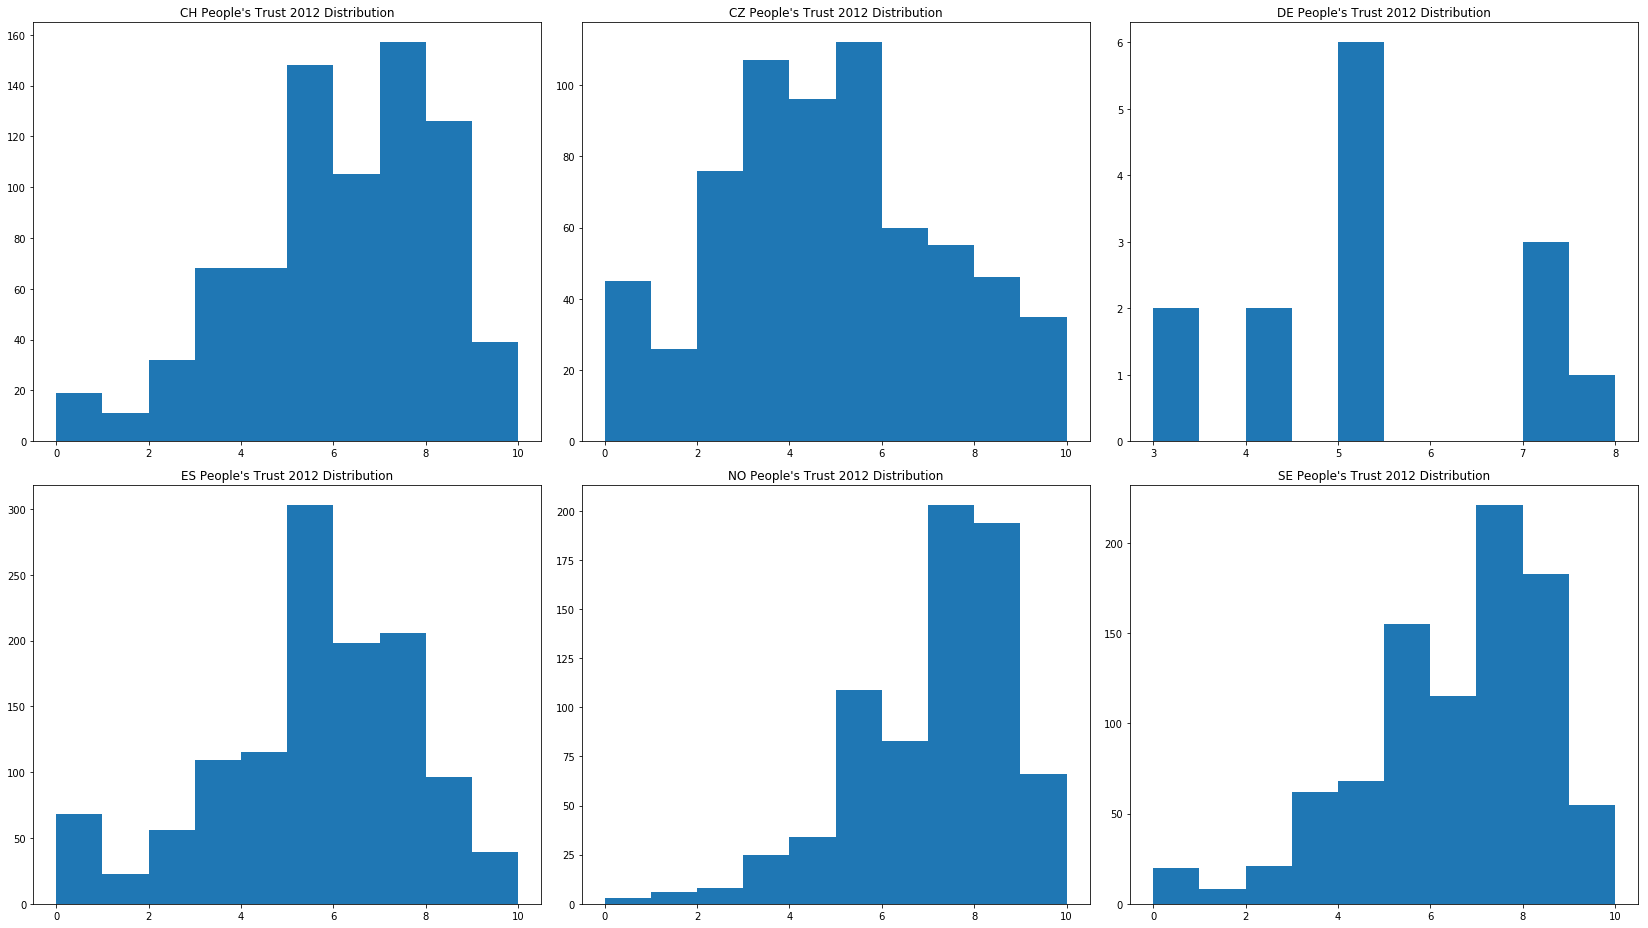

In [124]:
vis_hist(df_list_2012)

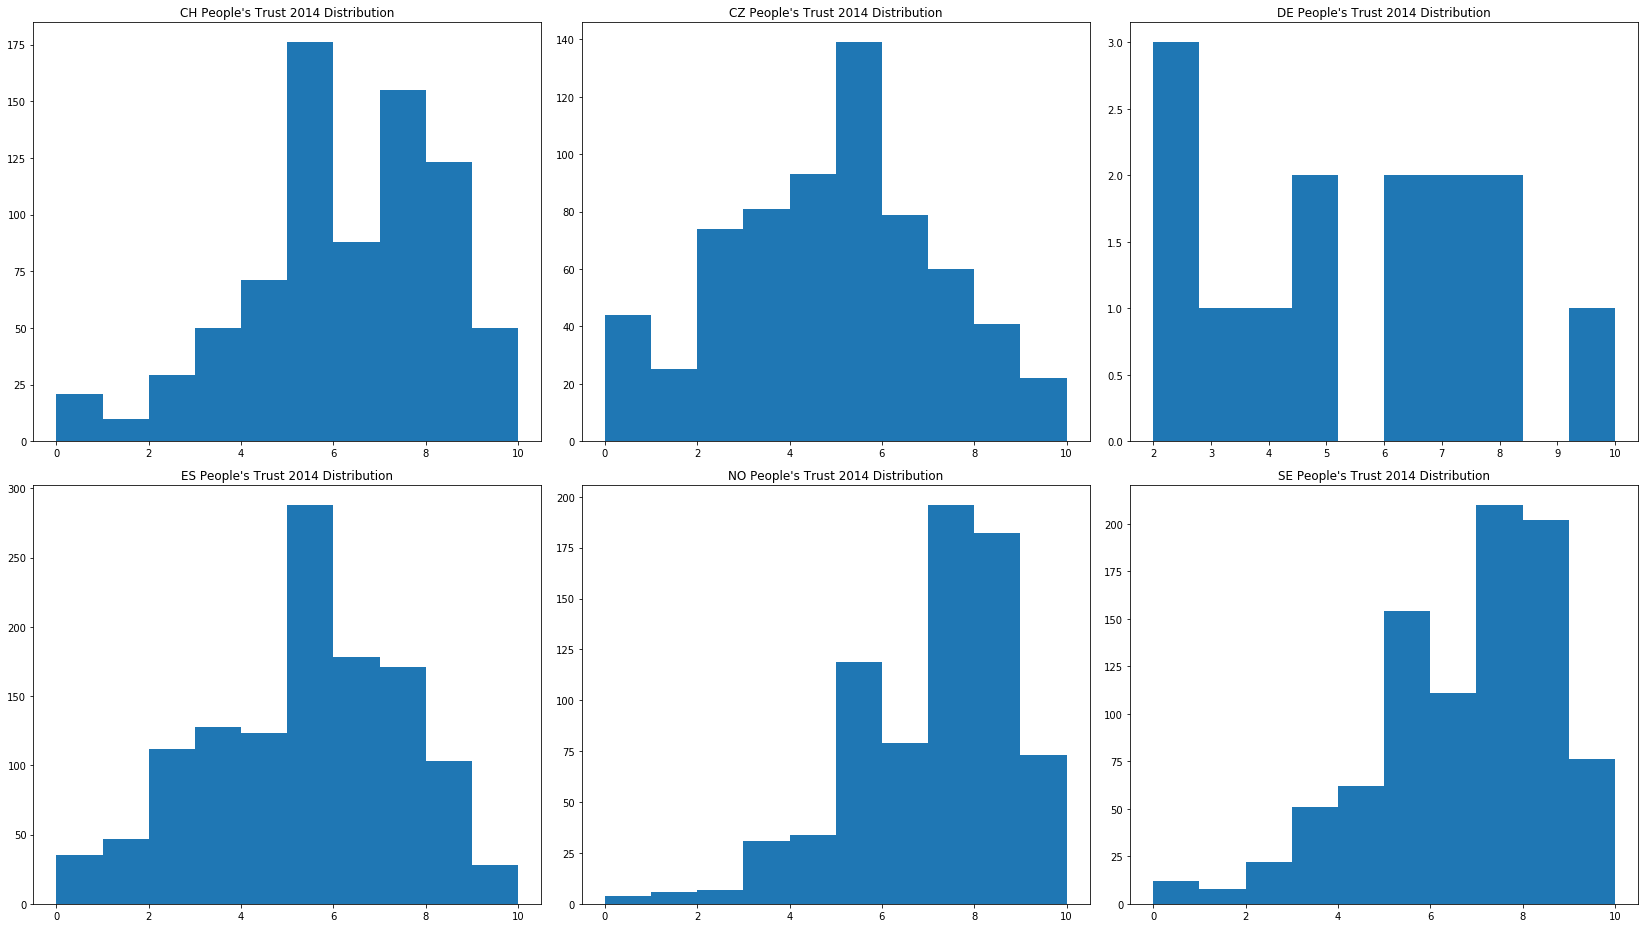

In [126]:
vis_hist(df_list_2014)

2012 - 2014

CH: 773 rows,
CZ: 658 rows,
DE: 14 rows,
ES: 1213 rows,
NO: 731 rows,
SE: 908 rows,

In [139]:
# non-parametric test (A: 2012 ppltrst (control), B: 2014 ppltrst (experimental))
import scipy.stats as stats

cntry_list = ["CH","CZ","DE","ES","NO","SE"]

for cntry,df_2012,df_2014 in zip (cntry_list,df_list_2012,df_list_2014):
    print(cntry + ": ",stats.kruskal(df_2012["ppltrst"],df_2014["ppltrst"]))

CH:  KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048)
CZ:  KruskalResult(statistic=0.5340306520300221, pvalue=0.4649172016371461)
DE:  KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199)
ES:  KruskalResult(statistic=8.149961651374431, pvalue=0.004306207168095373)
NO:  KruskalResult(statistic=0.24569560721491657, pvalue=0.620122374635789)
SE:  KruskalResult(statistic=4.335895080514051, pvalue=0.037316790239688535)


In [140]:
# close to normal distributions, lets try parametric test 
for cntry,df_2012,df_2014 in zip (cntry_list,df_list_2012,df_list_2014):
    print(cntry + ": ",stats.ttest_ind(df_2012["ppltrst"],df_2014["ppltrst"]))

CH:  Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
CZ:  Ttest_indResult(statistic=-0.39418543261711414, pvalue=0.6935081020969057)
DE:  Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
ES:  Ttest_indResult(statistic=2.4837720623641446, pvalue=0.013067001200379165)
NO:  Ttest_indResult(statistic=0.5436344941028719, pvalue=0.5867760147589384)
SE:  Ttest_indResult(statistic=-2.1029309554508333, pvalue=0.03560925311628811)


It appears that for both parametric and non-parametric tests, any difference between people's trust between 2012 and 2014 in each country, besides ES & SE, will not be significant. We initially chose non-parametric because the distributions appeared to be non-normally distributed. On the other hand, we could interpret most of the histograms to being "close" to normal distributions and therefore justify the use of parametric tests to try and get more information about the difference between people's trust between 2012 and 2014. 

In most of the countries, it appears that people's trust did not significantly change between 2012 and 2014 because the t-statistic seemed to be consistently close to 0 in every case. The two countries that had the most significant change were ES and SE.

Furthermore, due to the method in which we wplit the data, we decided to do an A/B test and not an A/B/C...test. This shouldn't cause any significant change in our test outcomes, but it should be stated that we did an A/B test when we could've also done an A/B/C... test.

In [ ]:
# calculate difference in ppltrst between 2012-2014 for ES and SE (did people become less trusting?)
